# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
##from google.colab import drive
##drive.mount('/content/drive')

In [3]:
# read the data
##df = pd.read_csv('/content/drive/MyDrive/[Academic]/1 | Great Learning/2 | Python - Foundations/Project 1/foodhub_order.csv')
# returns the first 5 rows
##df.head()

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Check the shape of the dataset
df.shape

(1898, 9)

#### Observations:
The dataset consists of 1898 rows and 9 columns. Each row represents a unique food order, and each column provides specific details about these orders.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset contains a mix of data types: integer (int64) for numerical values like order ID, customer ID, and times; float (float64) for cost; and object type (object) for textual or categorical data like restaurant names and cuisine types.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the dataset. Each column has a non-null count equal to the total number of rows, indicating completeness of the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
#Get the summary statistics of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
The "not given" rating is significantly high, might causes some inaccuracy of the overall rating, basically, the ideal situation is to encourage customer to rate to get a better feedback from them.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

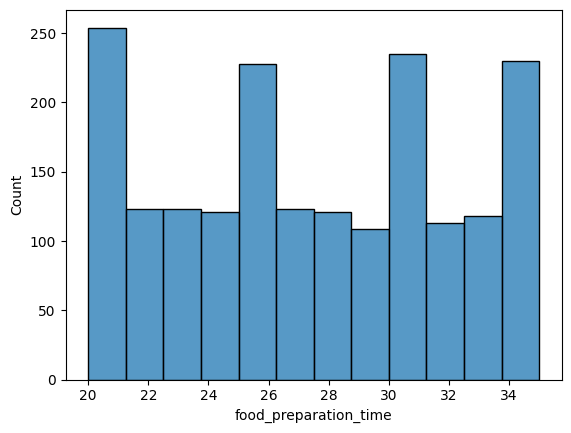

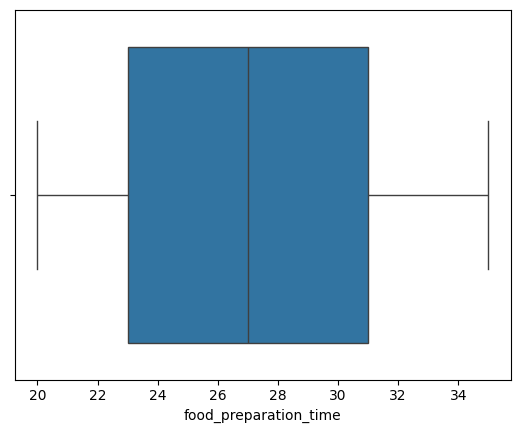

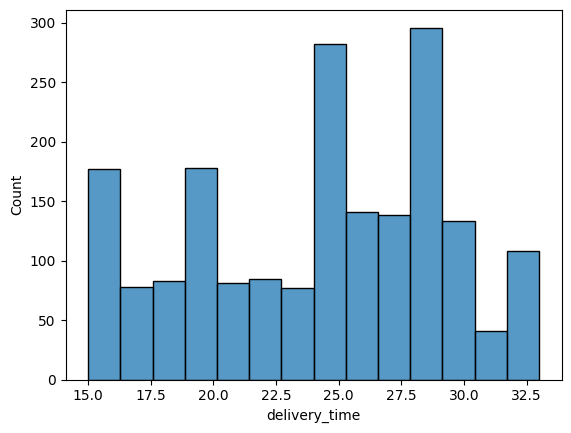

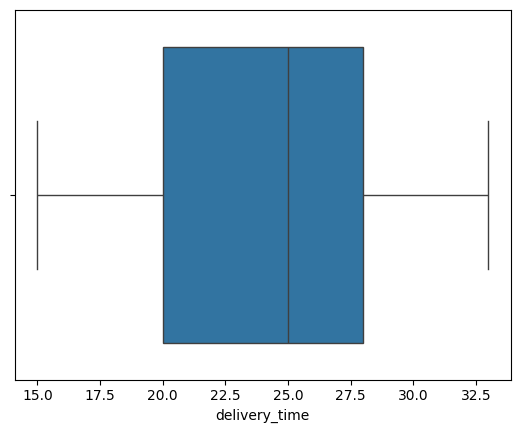

In [10]:
# For Customer ID
df['customer_id'].nunique()

# For Restaurant name
df['restaurant_name'].nunique()

# For Cusine type
df['cuisine_type'].nunique()

# For Day of the week
df['day_of_the_week'].unique()

# For Rating
df['rating'].unique()


# For Food Preparation time
sns.histplot(data=df, x='food_preparation_time')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()


# For Delivery time
sns.histplot(data=df, x='delivery_time')
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [11]:
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The Shake Shack is the higest among all, almost double from the second highest, really showing the 80/20 law in the real life as an epiphany.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [12]:
# First, create a subset of the DataFrame for orders placed on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']

# Then, find the most popular cuisine on weekends
most_popular_cuisine_weekend = df_weekend['cuisine_type'].value_counts().idxmax()

# Print the most popular cuisine on weekends
print("The most popular cuisine on weekends is:", most_popular_cuisine_weekend)


The most popular cuisine on weekends is: American


#### Observations:
Amercain cuisine is the most popular on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [13]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')


The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %

### **Question 10**: What is the mean order delivery time? [1 mark]

In [14]:
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')


The mean delivery time for this dataset is 24.16 minutes


#### Observations:
The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [15]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
This result is showing the loyality of 3 customers, who have ordered 13, 10, 9 orders respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


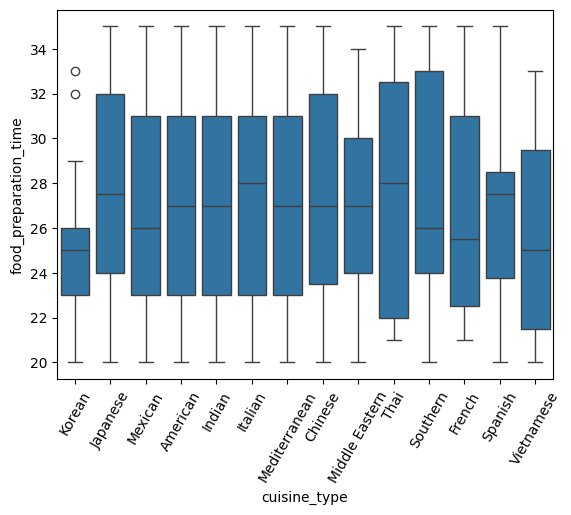

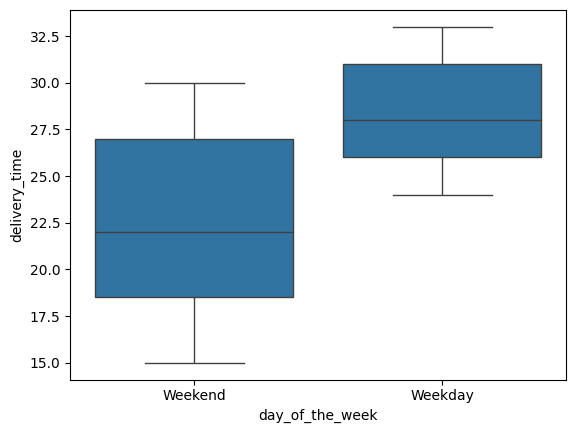

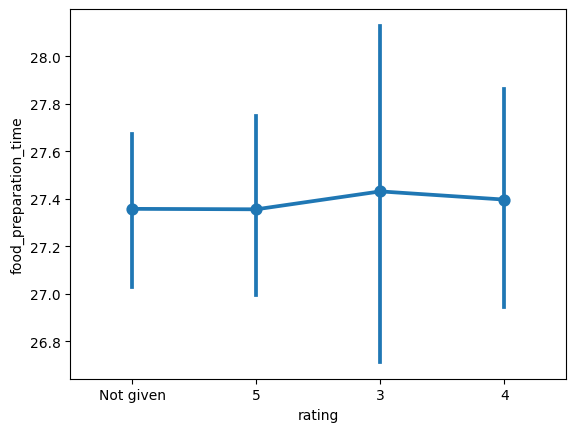

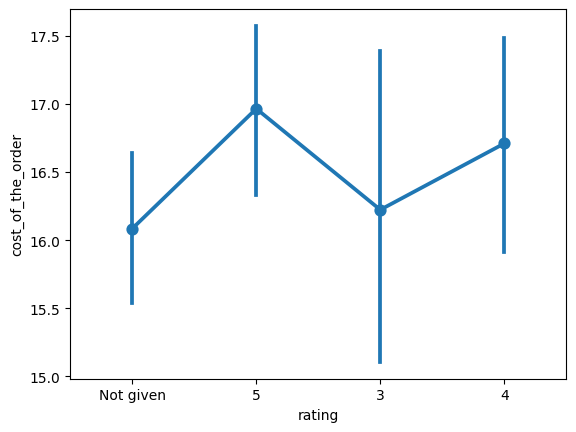

In [16]:
# For Cuisine vs Food Preparation time
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

# For Day of the Week vs Delivery time
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.show()

# For Rating vs Food preparation time
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

# For Rating vs Cost of the order
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [17]:
# Convert rating to numeric, excluding 'Not given'
df_rated = df[df['rating'] != 'Not given']
df_rated['rating'] = pd.to_numeric(df_rated['rating'])

# Count ratings for each restaurant
rating_counts = df_rated['restaurant_name'].value_counts()

# Filter restaurants with more than 50 ratings
restaurants_over_50 = rating_counts[rating_counts > 50].index

# Calculate mean rating for these restaurants
mean_ratings = df_rated[df_rated['restaurant_name'].isin(restaurants_over_50)].groupby('restaurant_name')['rating'].mean()

# Filter restaurants with average rating greater than 4
eligible_restaurants = mean_ratings[mean_ratings > 4]
eligible_restaurants


/var/folders/h3/2j66h4kj3cgb5b62h1gf5t_80000gn/T/ipykernel_27534/2778701476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['rating'] = pd.to_numeric(df_rated['rating'])


restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:
This shows the rating of the most popular 4 cuisines among all, the top is Blue Ribbon Fried Chichen.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [18]:
def compute_rev(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return 0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')



The net revenue is around 6166.3 dollars


#### Observations:
The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [19]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
percentage_above_60 = (df[df['total_time'] > 60].shape[0] / df.shape[0]) * 100
print("Percentage of orders taking more than 60 minutes:", round(percentage_above_60, 2), '%')


Percentage of orders taking more than 60 minutes: 10.54 %


#### Observations:
Percentage of orders taking more than 60 minutes: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [20]:
mean_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('Mean delivery time on weekdays:', round(mean_weekday, 2), 'minutes')
print('Mean delivery time on weekends:', round(mean_weekend, 2), 'minutes')



Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:
ean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  To sum up, the restaurant has wide range of cuisines, loyal customer, specialized 4 cuisines rating from 4.3 - 4.2, however, maybe due to the level of popularity, resulted in the
insuffciency of delivery time, which has to be addressed.

### Recommendations:

*  The delivery time need to be addressed as mentioned above, also the engagement of rating from the customers, which I believe will be a game changer of the restaurant, the best is yet to come.